### Keras CNN으로 패션 아이템 구분하기

1. 패키지 수입 및 파라미터 지정

In [1]:
# 패키지 수입
import matplotlib.pyplot as plt
import numpy as np

from time import time
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import np_utils

from keras.layers import Flatten
from keras.layers import Dense, MaxPool2D
from keras.layers import Conv2D, InputLayer

In [2]:
# 파라미터
MY_EPOCH = 10
MY_BATCH = 500

2. 데이터 처리

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

print('학습용 입력 데이터:', X_train.shape)
print('학습용 출력 데이터:', Y_train.shape)

print('평가용 입력 데이터:', X_test.shape)
print('평가용 출력 데아터:', Y_test.shape)

학습용 입력 데이터: (60000, 28, 28)
학습용 출력 데이터: (60000,)
평가용 입력 데이터: (10000, 28, 28)
평가용 출력 데아터: (10000,)


학습용 데이터 첫번째 이미지 화소 정보
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0 

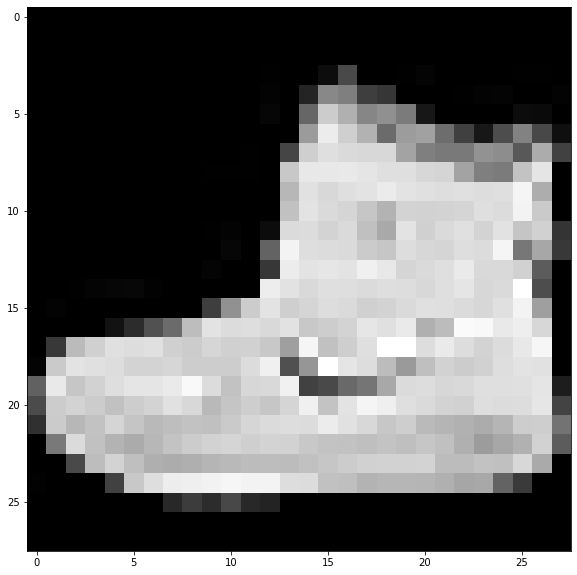

In [4]:
# 데이터 샘플 출력
print('학습용 데이터 첫번째 이미지 화소 정보')
print(X_test[0])
plt.figure(figsize=(10, 10))
plt.imshow(X_train[0], cmap='gray')
print('학습용 데이터 첫번째 이미지 라벨:', Y_train[0])

In [5]:
# 데이터 스케일링
X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train[0])

# 데이터 모양 정보 전환
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [6]:
# 라벨 정보 수정
Y_train = np_utils.to_categorical(Y_train, 10)
print('학습용 데이터 첫번째 이미지 라벨:', Y_train[0])

Y_test = np_utils.to_categorical(Y_test, 10)
print('평가용 데이터 첫번째 이미지 라벨:', Y_train[0])

print('학습용 입력 데이터:', X_train.shape)
print('학습용 출력 데이터:', Y_train.shape)

print('평가용 입력 데이터:', X_test.shape)
print('평가용 출력 데아터:', Y_test.shape)

학습용 데이터 첫번째 이미지 라벨: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
평가용 데이터 첫번째 이미지 라벨: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
학습용 입력 데이터: (60000, 28, 28, 1)
학습용 출력 데이터: (60000, 10)
평가용 입력 데이터: (10000, 28, 28, 1)
평가용 출력 데아터: (10000, 10)


3. 인공신경망 구현

In [11]:
# CNN 구현
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1)))

# 첫번째 합성곱 블럭
model.add(Conv2D(filters=32*4,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=2))

# 두번째 합성곱 블럭
model.add(Conv2D(filters=64*4,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=2))

# 세번째 합성곱 블럭
model.add(Conv2D(filters=128*4,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=2))

# 네번째 합성곱 블럭
model.add(Conv2D(filters=256*4,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=2))

# DNN 입성
model.add(Flatten())

model.add(Dense(units=500,
                activation='relu'))

model.add(Dense(units=10,
                activation='softmax'))

print('CNN 요약')
model.summary()

CNN 요약
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 512)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 1024)

4. 인공신경망 학습

In [12]:
# 학습 방식 설정
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

# CNN 학습
print('학습 시작')
begin = time()

model.fit(x=X_train,
          y=Y_train,
          epochs=MY_EPOCH,
          batch_size=MY_BATCH,
          verbose=1)

end = time()

print('학습 시간: {:.2f}' .format(end-begin))

학습 시작
Epoch 1/10
120/120 [==============================] - 6s 50ms/step - loss: 1.0428 - acc: 0.6106
Epoch 2/10
120/120 [==============================] - 6s 50ms/step - loss: 0.3398 - acc: 0.8741
Epoch 3/10
120/120 [==============================] - 6s 50ms/step - loss: 0.2698 - acc: 0.9010
Epoch 4/10
120/120 [==============================] - 6s 50ms/step - loss: 0.2302 - acc: 0.9159
Epoch 5/10
120/120 [==============================] - 6s 50ms/step - loss: 0.1987 - acc: 0.9278
Epoch 6/10
120/120 [==============================] - 6s 50ms/step - loss: 0.1728 - acc: 0.9356
Epoch 7/10
120/120 [==============================] - 6s 50ms/step - loss: 0.1523 - acc: 0.9434
Epoch 8/10
120/120 [==============================] - 6s 50ms/step - loss: 0.1364 - acc: 0.9506
Epoch 9/10
120/120 [==============================] - 6s 50ms/step - loss: 0.1128 - acc: 0.9579
Epoch 10/10
120/120 [==============================] - 6s 50ms/step - loss: 0.1013 - acc: 0.9625
학습 시간: 60.42


5. CNN 평가

In [13]:
# CNN 평가
score = model.evaluate(x=X_test,
                       y=Y_test,
                       verbose=1)

print('최종 손실값: {:.2f}' .format(score[0]))
print('최종 정확도: {:.2f}' .format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2388 - acc: 0.9250
최종 손실값: 0.24
최종 정확도: 0.93


6. CNN 예측

(28, 28, 1)
CNN 예측 값: [[7.1893723e-05 1.8906749e-06 2.6453084e-01 1.9257077e-05 7.3341292e-01
  2.2914622e-07 1.9549183e-03 5.3945723e-07 6.4114724e-06 1.0654294e-06]]
정답: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


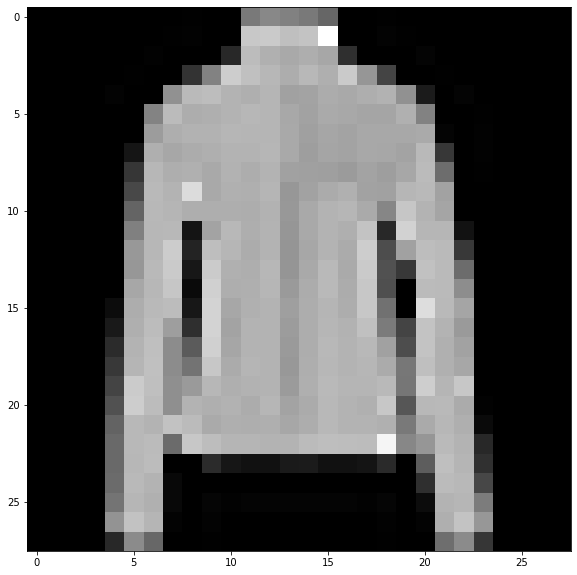

In [10]:
# 샘플링 이미지 지정
image = X_test[1234]
print(image.shape)

# batch 정보 추가
image = image.reshape(1, 28, 28, 1)
pred = model.predict(image)

# 정보 출력
print('CNN 예측 값:', pred)
print('정답:',Y_test[1234])

tmp = image.reshape(28, 28)
plt.figure(figsize=(10, 10))
plt.imshow(tmp, cmap='gray')